 # MPA-MLF, Lab 7 - Convolutional Neural Network

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [37]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten,MaxPooling2D,Conv2D
from keras.optimizers import SGD,Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
###################################

font = {'weight' : 'bold', 'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [5]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

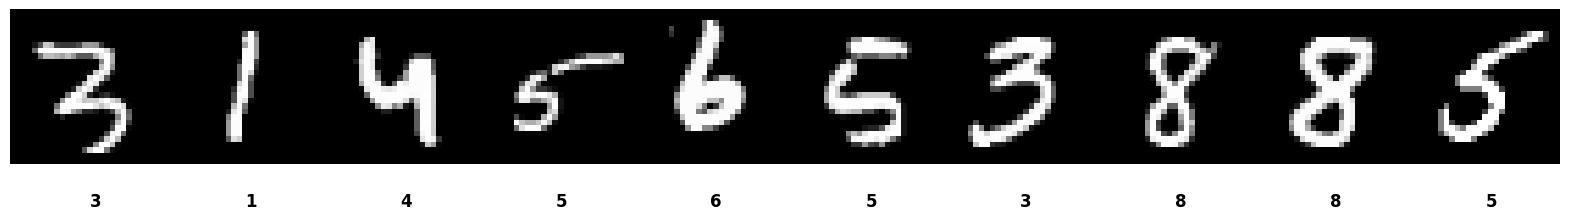

In [6]:
display_random_images(X_train, y_train)

Review the dataset. Answer the following questions yourself:

- What type of data appears in our dataset?
--> we have pictures

- How many data samples do we have in the training and testing datasets?
--> we have 10 number

- How many color channels does the input variable have?
--> we have 2 colors as input. black and white.

-How big are the input images?-
->each image is 48x48 pixels so the 10 images are 48x480 pixels

- How much preprocessing is required of the input data X?


- How many classes do we have in the variable target?
-> we have 10 variable target

- What is the necessary preprocessing of the target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [43]:
np.unique(X_train)
X_train=X_train.astype(np.float32)/255
y_train_encoded= to_categorical(y_train,num_classes=10)

X_train.shape


(60000, 28, 28)

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [44]:
model = Sequential()
###################################


model.add(Conv2D(64, (5, 5), activation='relu',input_shape=(28, 28, 1)) )
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))


###################################


In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [45]:


learning_rate = 0.001
loss = 'categorical_crossentropy'
optimizer = Adam(learning_rate)
metrics = ['accuracy']


model.compile(loss=loss, optimizer=optimizer, metrics=metrics)



### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [46]:
###################################
# Write your own code here #
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train_encoded, epochs=80, batch_size=128, validation_split=0.2)


###################################

Epoch 1/80
375/375 [==============================] - 4s 7ms/step - loss: 1.1029 - accuracy: 0.6522 - val_loss: 0.4084 - val_accuracy: 0.8766
Epoch 2/80
375/375 [==============================] - 2s 6ms/step - loss: 0.3836 - accuracy: 0.8843 - val_loss: 0.3072 - val_accuracy: 0.9076
Epoch 3/80
375/375 [==============================] - 3s 7ms/step - loss: 0.2917 - accuracy: 0.9126 - val_loss: 0.2315 - val_accuracy: 0.9326
Epoch 4/80
375/375 [==============================] - 3s 9ms/step - loss: 0.2248 - accuracy: 0.9338 - val_loss: 0.1824 - val_accuracy: 0.9502
Epoch 5/80
375/375 [==============================] - 4s 9ms/step - loss: 0.1774 - accuracy: 0.9484 - val_loss: 0.1465 - val_accuracy: 0.9600
Epoch 6/80
375/375 [==============================] - 2s 5ms/step - loss: 0.1467 - accuracy: 0.9566 - val_loss: 0.1291 - val_accuracy: 0.9638
Epoch 7/80
375/375 [==============================] - 2s 5ms/step - loss: 0.1265 - accuracy: 0.9627 - val_loss: 0.1153 - val_accuracy: 0.9670
Epoch 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

In [48]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')


Test loss: 0.05805375427007675
Test accuracy: 98.72000217437744 %


### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [ ]:
###################################
# Write your own code here #



###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it